In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [81]:
df= pd.read_csv("kWh_elec.csv")
#df.sort_values(by='Month', ascending= True, inplace= True)
df=df.iloc[::-1]
df.dropna(inplace= True)
df.set_index('Month', inplace=True)
df.index=pd.to_datetime(df.index)


In [83]:
df.info

<bound method DataFrame.info of             all sectors million kilowatthours  \
Month                                           
2001-01-01                       310816.06880   
2001-02-01                       272334.73804   
2001-03-01                       269298.40142   
2001-03-01                       254390.93545   
2001-04-01                       264490.49166   
...                                       ...   
2023-08-01                       346128.54938   
2023-09-01                       307874.44273   
2023-11-01                       293487.06424   
2023-12-01                       310959.15193   
2024-01-01                       341010.38748   

            residential million kilowatthours  \
Month                                           
2001-01-01                       127065.78354   
2001-02-01                        99877.67304   
2001-03-01                        92804.58576   
2001-03-01                        82453.78260   
2001-04-01                        81

In [74]:
df

,all sectors million kilowatthours,residential million kilowatthours,commercial million kilowatthours,industrial million kilowatthours
Month,,,,
Jan 2001,310816.06880,127065.78354,90825.27235,83477.36044
Feb 2001,272334.73804,99877.67304,81466.85778,82248.23193
Mar 2001,269298.40142,92804.58576,84064.24963,83521.51752
Mar 2001,254390.93545,82453.78260,81060.53414,82253.07658
Apr 2001,264490.49166,81731.15295,87470.74429,86096.58080
...,...,...,...,...
Aug 2023,346128.54938,133320.40209,123663.04503,88494.63892
Sep 2023,307874.44273,103767.45036,115378.55778,88163.53998
Nov 2023,293487.06424,102427.52221,107050.72376,83460.29819


<Axes: xlabel='Month'>

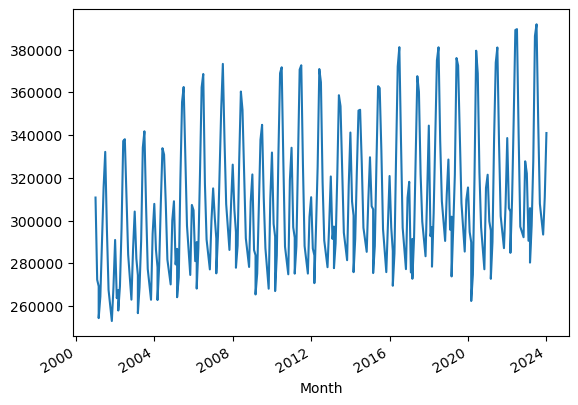

In [72]:
df['all sectors million kilowatthours'].plot()

In [44]:
df = df['residential million kilowatthours']

<Axes: title={'center': 'Residential million kilowatthours'}, xlabel='Month'>

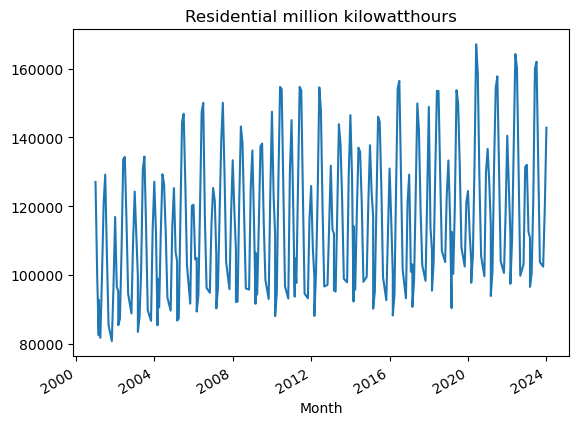

In [45]:
plt.title("Residential million kilowatthours")
df.plot()

In [52]:
def plot_acf_pacf(data, lags=12):
    fig, ax = plt.subplots(2)
    plot_acf(data, lags=lags, ax=ax[0], zero=False, title='Autocorrection Function (ACF)')
    plot_pacf(data, lags=lags, ax=ax[1], zero=False, title='Partial Autocorrection Function (PACF)')
    plt.tight_layout()
    plt.show()

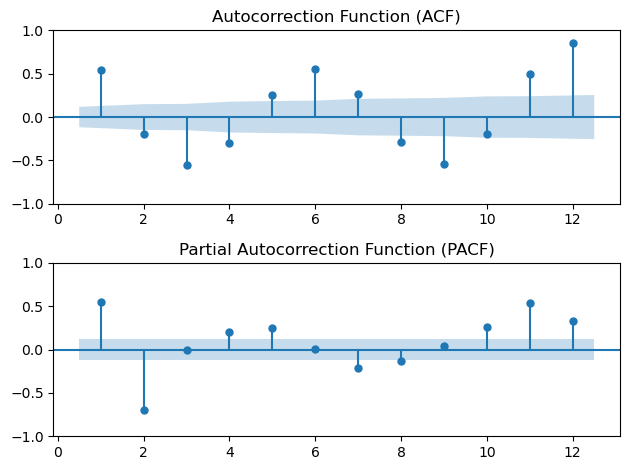

In [53]:
plot_acf_pacf(df)

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
model = SARIMAX(df['all sectors million kilowatthours'], order=(1, 1, 1),freq='MS')
results = model.fit()
model

ValueError: The given frequency argument could not be matched to the given index.

C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Student\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


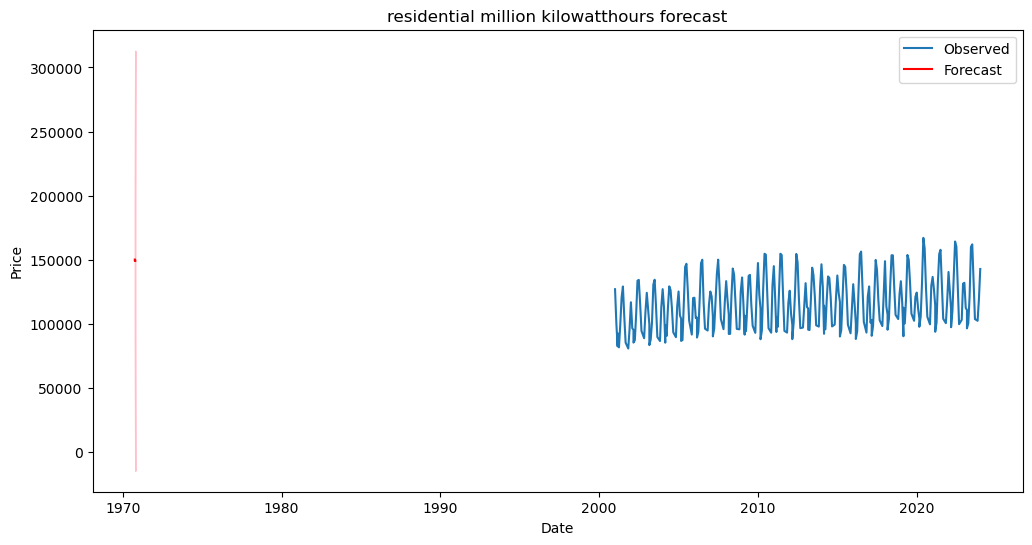

In [62]:
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
 
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')

plt.title("residential million kilowatthours forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()